In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats


In [2]:
train_lr_2 = pd.read_csv('trainLR2.csv')
test_lr_2 = pd.read_csv('testLR2.csv')

In [3]:
train_lr_2.head()

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
0,Own Home,482087.0,NaN,0.0,11.0,26.3,685960.0,1.0,NaN,1.0,debt consolidation,Short Term,99999999.0,47386.0,7914.0,749.0,0
1,Own Home,1025487.0,10+ years,0.0,15.0,15.3,1181730.0,0.0,NaN,0.0,debt consolidation,Long Term,264968.0,394972.0,18373.0,737.0,1
2,Home Mortgage,751412.0,8 years,0.0,11.0,35.0,1182434.0,0.0,NaN,0.0,debt consolidation,Short Term,99999999.0,308389.0,13651.0,742.0,0
3,Own Home,805068.0,6 years,0.0,8.0,22.5,147400.0,1.0,NaN,1.0,debt consolidation,Short Term,121396.0,95855.0,11338.0,694.0,0
4,Rent,776264.0,8 years,0.0,13.0,13.6,385836.0,1.0,NaN,0.0,debt consolidation,Short Term,125840.0,93309.0,7180.0,719.0,0


In [4]:
train_lr_2.describe()


,Annual Income,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
count,5.943000e+03,7500.000000,7500.000000,7500.000000,7.500000e+03,7500.000000,3419.000000,7486.000000,7.500000e+03,7.500000e+03,7500.000000,5943.000000,7500.000000
mean,1.366392e+06,0.030133,11.130933,18.317467,9.451537e+05,0.170000,34.692600,0.117152,1.187318e+07,2.898332e+05,18314.454133,1151.087498,0.281733
std,8.453392e+05,0.271604,4.908924,7.041946,1.602622e+07,0.498598,21.688806,0.347192,3.192612e+07,3.178714e+05,11926.764673,1604.451418,0.449874
min,1.645970e+05,0.000000,2.000000,4.000000,0.000000e+00,0.000000,0.000000,0.000000,1.124200e+04,0.000000e+00,0.000000,585.000000,0.000000
25%,8.443410e+05,0.000000,8.000000,13.500000,2.792295e+05,0.000000,16.000000,0.000000,1.801690e+05,1.142565e+05,10067.500000,711.000000,0.000000
50%,1.168386e+06,0.000000,10.000000,17.000000,4.781590e+05,0.000000,32.000000,0.000000,3.095730e+05,2.093230e+05,16076.500000,731.000000,0.000000
75%,1.640137e+06,0.000000,14.000000,21.800000,7.935015e+05,0.000000,50.000000,0.000000,5.198820e+05,3.604062e+05,23818.000000,743.000000,1.000000
max,1.014934e+07,7.000000,43.000000,57.700000,1.304726e+09,7.000000,118.000000,4.000000,1.000000e+08,6.506797e+06,136679.000000,7510.000000,1.000000


In [5]:
train_lr_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Home Ownership                7500 non-null   object 
 1   Annual Income                 5943 non-null   float64
 2   Years in current job          7129 non-null   object 
 3   Tax Liens                     7500 non-null   float64
 4   Number of Open Accounts       7500 non-null   float64
 5   Years of Credit History       7500 non-null   float64
 6   Maximum Open Credit           7500 non-null   float64
 7   Number of Credit Problems     7500 non-null   float64
 8   Months since last delinquent  3419 non-null   float64
 9   Bankruptcies                  7486 non-null   float64
 10  Purpose                       7500 non-null   object 
 11  Term                          7500 non-null   object 
 12  Current Loan Amount           7500 non-null   float64
 13  Cur

<Axes: >

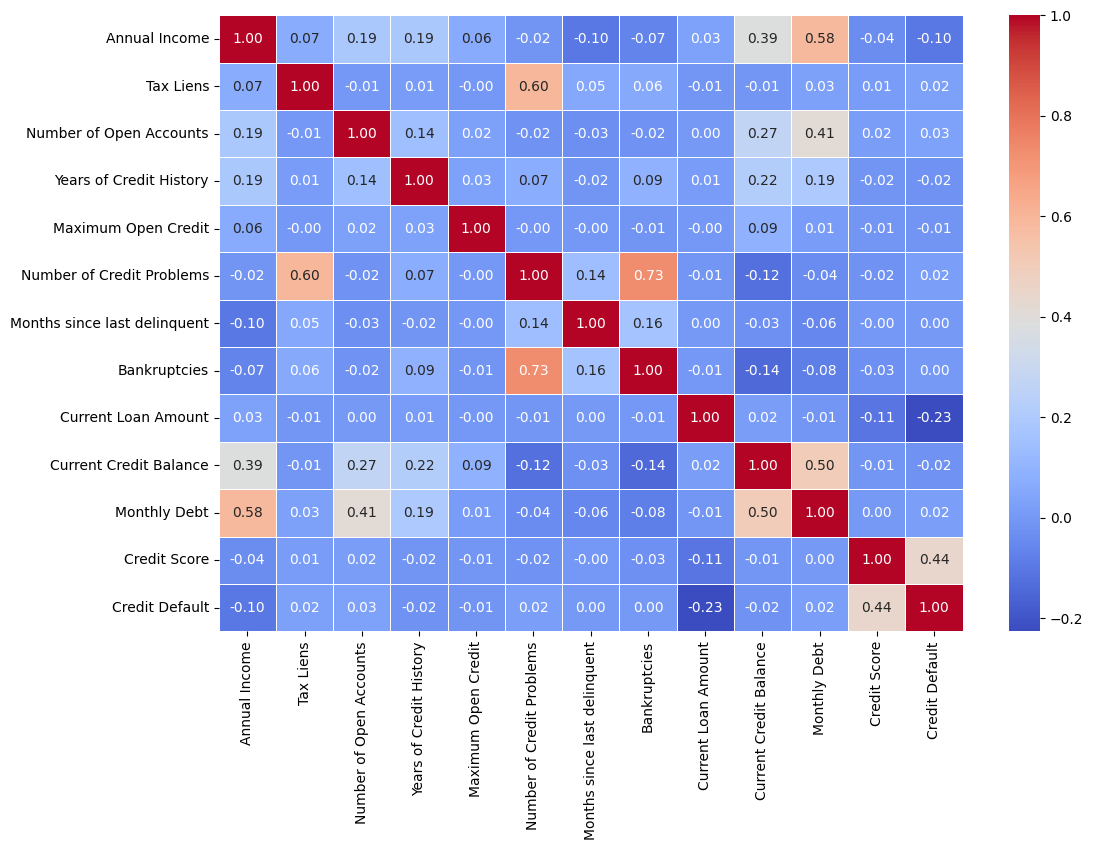

In [6]:
numerical_cols = train_lr_2.select_dtypes(include=['float64', 'int64'])

# Вычисляем корреляционную матрицу для числовых признаков
corr_matrix = numerical_cols.corr()

# Настроим размерность графика
plt.figure(figsize=(12, 8))

# Строим тепловую карту (heatmap) корреляционной матрицы
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5, cbar=True)



In [7]:
train_lr_2.isna().sum()

Home Ownership                     0
Annual Income                   1557
Years in current job             371
Tax Liens                          0
Number of Open Accounts            0
Years of Credit History            0
Maximum Open Credit                0
Number of Credit Problems          0
Months since last delinquent    4081
Bankruptcies                      14
Purpose                            0
Term                               0
Current Loan Amount                0
Current Credit Balance             0
Monthly Debt                       0
Credit Score                    1557
Credit Default                     0
dtype: int64

In [8]:
train_lr_2['Years in current job'] = train_lr_2['Years in current job'].fillna('0 years')
train_lr_2['Months since last delinquent'] = train_lr_2['Months since last delinquent'].fillna(0)
train_lr_2['Bankruptcies'] = train_lr_2['Bankruptcies'].fillna(0)
train_lr_2['Annual Income'] = train_lr_2['Annual Income'].fillna(train_lr_2['Annual Income'].median())
train_lr_2['Credit Score'] = train_lr_2['Credit Score'].fillna(train_lr_2['Credit Score'].median())

In [9]:
train_lr_2.isna().sum()

Home Ownership                  0
Annual Income                   0
Years in current job            0
Tax Liens                       0
Number of Open Accounts         0
Years of Credit History         0
Maximum Open Credit             0
Number of Credit Problems       0
Months since last delinquent    0
Bankruptcies                    0
Purpose                         0
Term                            0
Current Loan Amount             0
Current Credit Balance          0
Monthly Debt                    0
Credit Score                    0
Credit Default                  0
dtype: int64

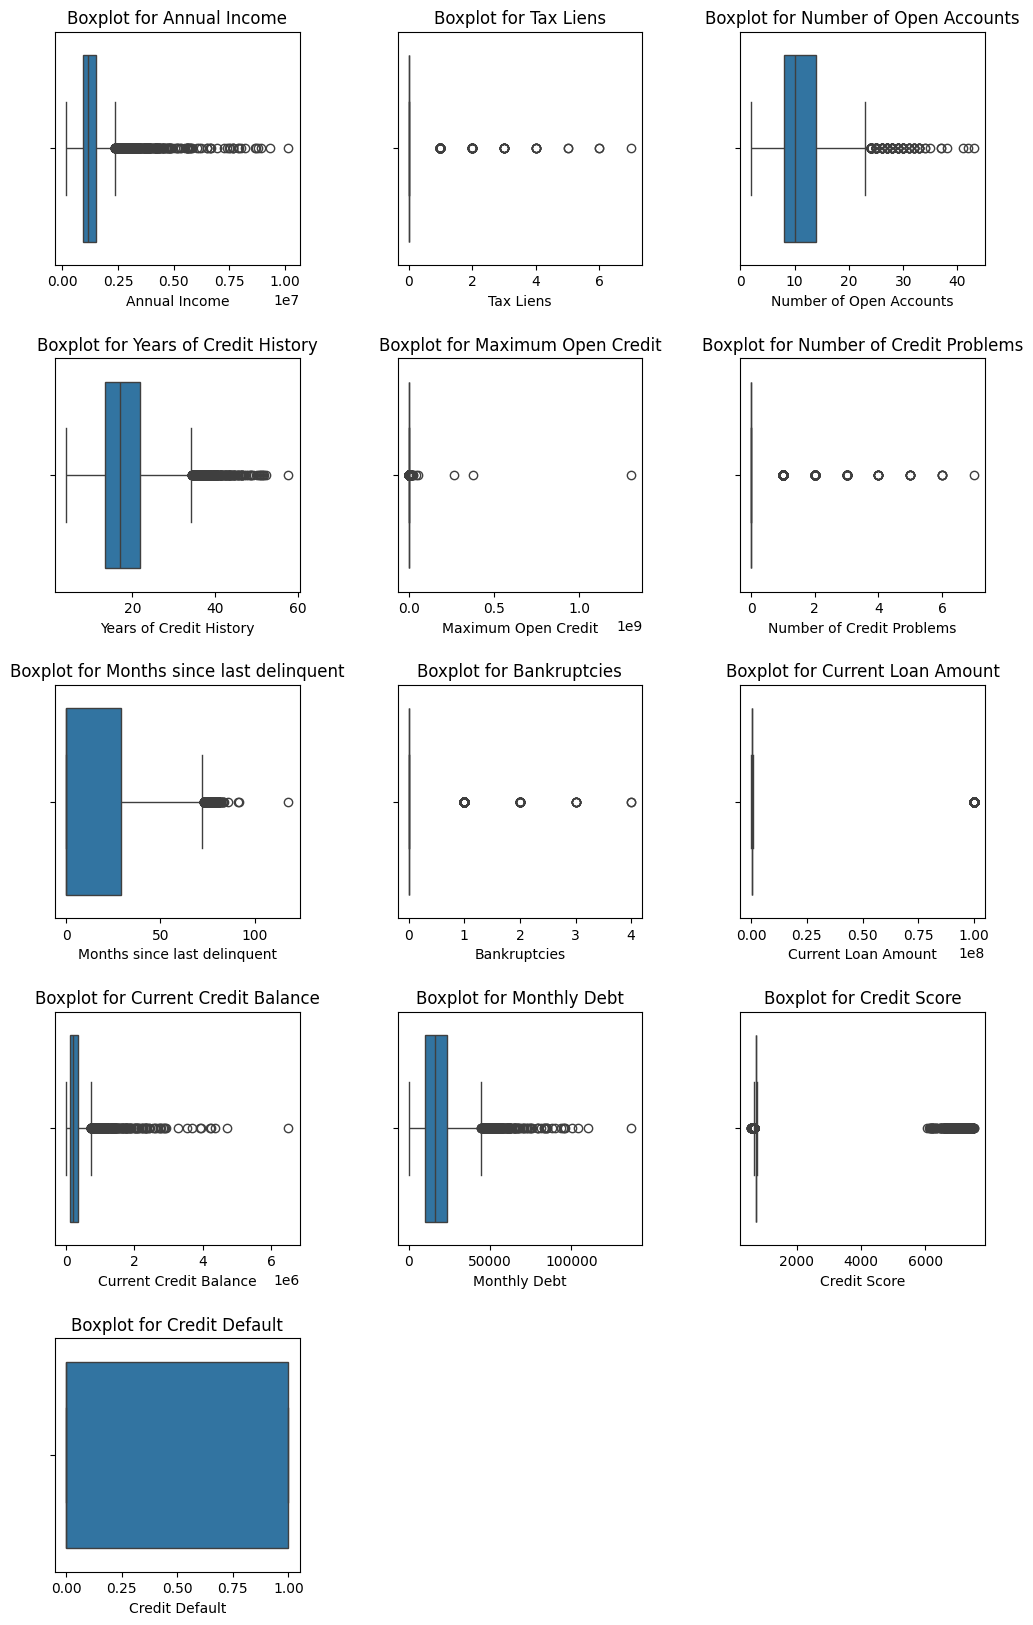

In [10]:
numeric_columns = train_lr_2.select_dtypes(include=['float64', 'int64']).columns

# Определим размеры сетки для подграфиков
n_cols = 3  # Количество столбцов в сетке
n_rows = (len(numeric_columns) // n_cols) + (len(numeric_columns) % n_cols > 0)  # Количество строк

# Настройка графиков
plt.figure(figsize=(12, 4 * n_rows))  # Увеличиваем высоту в зависимости от количества строк

for i, col in enumerate(numeric_columns):
    plt.subplot(n_rows, n_cols, i + 1)  # Создаем подграфики с правильным количеством строк и столбцов
    sns.boxplot(x=train_lr_2[col])
    plt.title(f'Boxplot for {col}')

# Увеличиваем расстояние между графиками
plt.subplots_adjust(hspace=0.4, wspace=0.4)

plt.show()

In [11]:
train_lr_2['Current Loan Amount'] = train_lr_2['Current Loan Amount'].where(train_lr_2['Current Loan Amount'] != 99999999, train_lr_2['Current Loan Amount'].median())

<Axes: xlabel='Current Loan Amount'>

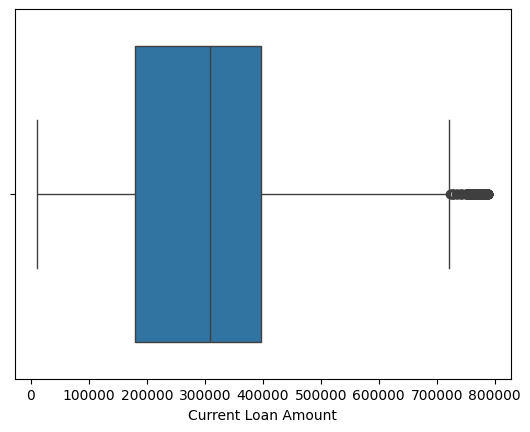

In [12]:
sns.boxplot(x=train_lr_2['Current Loan Amount'])

In [13]:
train_lr_2['Annual Income'] = train_lr_2['Annual Income'].where(train_lr_2['Annual Income'] <= 2200000, train_lr_2['Annual Income'].median())

train_lr_2['Number of Open Accounts'] = train_lr_2['Number of Open Accounts'].where(train_lr_2['Number of Open Accounts'] < 25, train_lr_2['Number of Open Accounts'].mode()[0])

train_lr_2['Years of Credit History'] = train_lr_2['Years of Credit History'].where(train_lr_2['Years of Credit History'] <= 35, train_lr_2['Years of Credit History'].mode()[0])

train_lr_2['Maximum Open Credit'] = train_lr_2['Maximum Open Credit'].where(train_lr_2['Maximum Open Credit'] <= 1400000, train_lr_2['Maximum Open Credit'].median())

train_lr_2['Months since last delinquent'] = train_lr_2['Months since last delinquent'].where(train_lr_2['Months since last delinquent'] <= 75, train_lr_2['Months since last delinquent'].mode()[0])

train_lr_2['Current Loan Amount'] = train_lr_2['Current Loan Amount'].where(train_lr_2['Current Loan Amount'] <= 730000, train_lr_2['Current Loan Amount'].median())

train_lr_2['Current Credit Balance'] = train_lr_2['Current Credit Balance'].where(train_lr_2['Current Credit Balance'] <= 600000, train_lr_2['Current Credit Balance'].median())

train_lr_2['Monthly Debt'] = train_lr_2['Monthly Debt'].where(train_lr_2['Monthly Debt'] <= 40000, train_lr_2['Monthly Debt'].median())

train_lr_2['Credit Score'] = train_lr_2['Credit Score'].where(train_lr_2['Credit Score'] <= 6000, train_lr_2['Credit Score'].median())

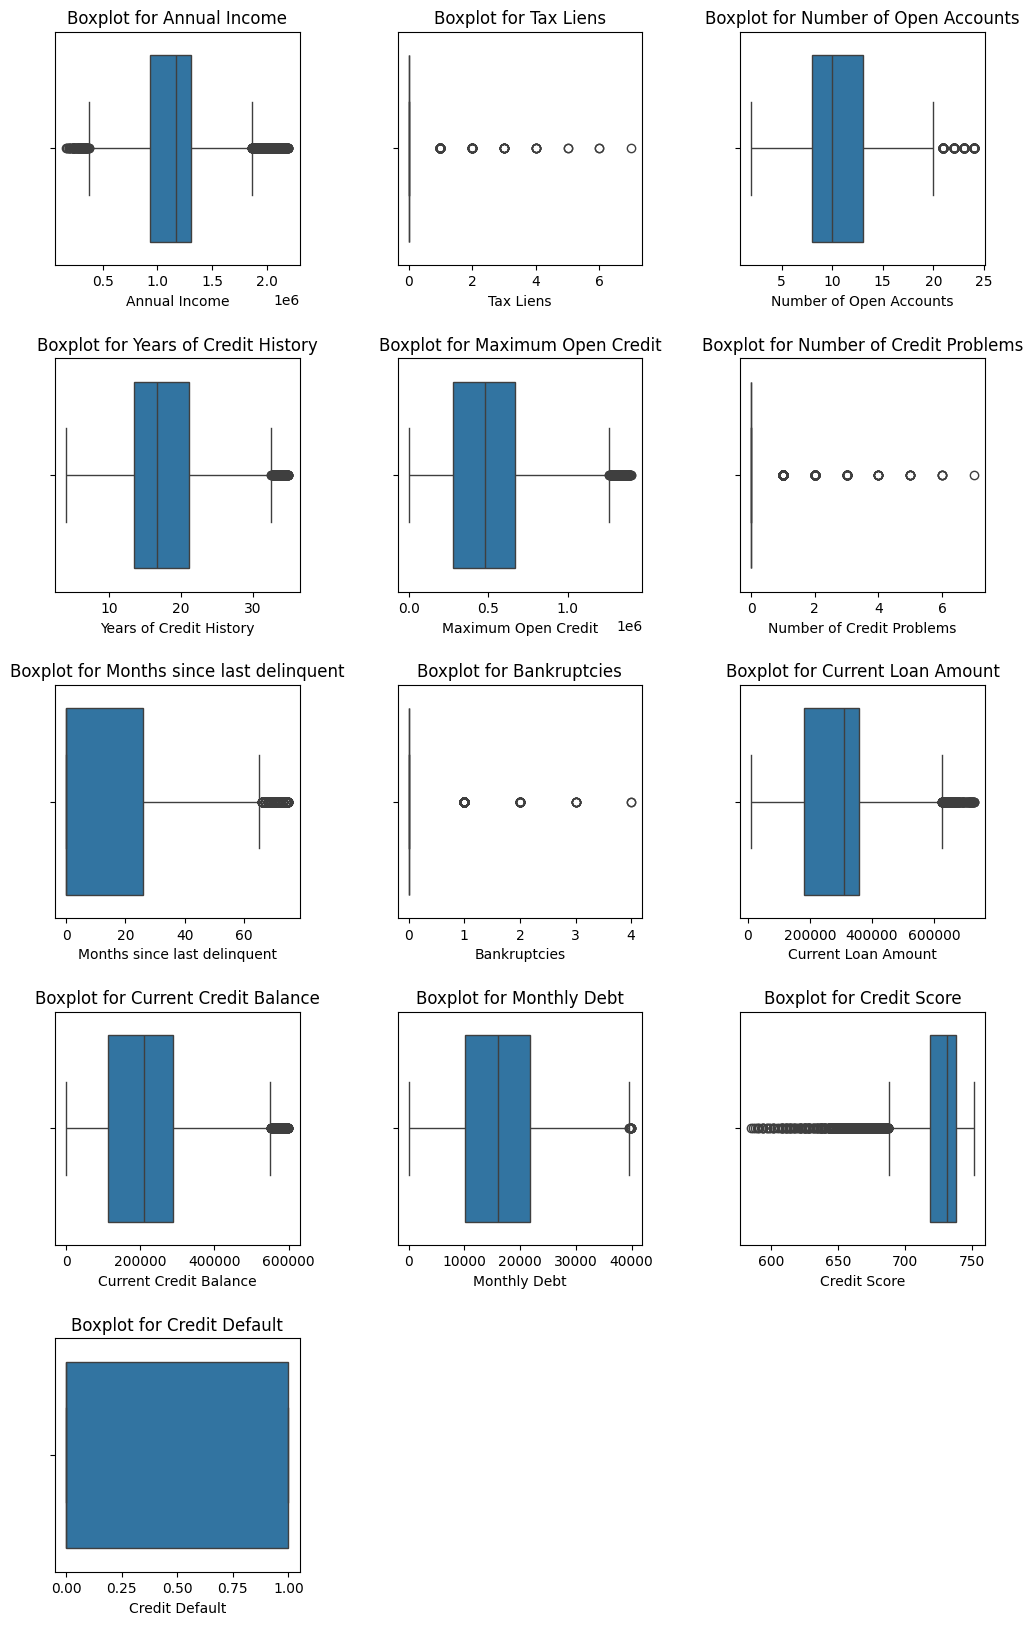

In [14]:
numeric_columns = train_lr_2.select_dtypes(include=['float64', 'int64']).columns

# Определим размеры сетки для подграфиков
n_cols = 3  # Количество столбцов в сетке
n_rows = (len(numeric_columns) // n_cols) + (len(numeric_columns) % n_cols > 0)  # Количество строк

# Настройка графиков
plt.figure(figsize=(12, 4 * n_rows))  # Увеличиваем высоту в зависимости от количества строк

for i, col in enumerate(numeric_columns):
    plt.subplot(n_rows, n_cols, i + 1)  # Создаем подграфики с правильным количеством строк и столбцов
    sns.boxplot(x=train_lr_2[col])
    plt.title(f'Boxplot for {col}')

# Увеличиваем расстояние между графиками
plt.subplots_adjust(hspace=0.4, wspace=0.4)

plt.show()

In [15]:
cat_features = ['Home Ownership', 'Years in current job', 'Purpose', 'Term']
numeric_columns = ['Annual Income', 'Tax Liens', 'Number of Open Accounts', 'Years of Credit History', 'Maximum Open Credit', \
                   'Number of Credit Problems', 'Months since last delinquent', 'Bankruptcies', 'Current Loan Amount', 'Current Credit Balance', 'Monthly Debt', 'Credit Score']

In [16]:
train_lr_2 = pd.get_dummies(train_lr_2, columns=cat_features, drop_first=True)

In [17]:
train_lr_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 42 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Annual Income                   7500 non-null   float64
 1   Tax Liens                       7500 non-null   float64
 2   Number of Open Accounts         7500 non-null   float64
 3   Years of Credit History         7500 non-null   float64
 4   Maximum Open Credit             7500 non-null   float64
 5   Number of Credit Problems       7500 non-null   float64
 6   Months since last delinquent    7500 non-null   float64
 7   Bankruptcies                    7500 non-null   float64
 8   Current Loan Amount             7500 non-null   float64
 9   Current Credit Balance          7500 non-null   float64
 10  Monthly Debt                    7500 non-null   float64
 11  Credit Score                    7500 non-null   float64
 12  Credit Default                  75

In [18]:
train_lr_2.to_csv('train_lr_2_processed.csv', index=False)

In [19]:
def prepare_data(df):
    df['Years in current job'] = df['Years in current job'].fillna('0 years')
    df['Months since last delinquent'] = df['Months since last delinquent'].fillna(0)
    df['Bankruptcies'] = df['Bankruptcies'].fillna(0)
    df['Annual Income'] = df['Annual Income'].fillna(df['Annual Income'].median())
    df['Credit Score'] = df['Credit Score'].fillna(df['Credit Score'].median())
    df['Current Loan Amount'] = df['Current Loan Amount'].where(df['Current Loan Amount'] != 99999999, df['Current Loan Amount'].median())
    df['Tax Liens'] = df['Tax Liens'].astype(int)
    df['Number of Open Accounts'] = df['Number of Open Accounts'].astype(int)
    df['Number of Credit Problems'] = df['Number of Credit Problems'].astype(int)
    df['Months since last delinquent'] = df['Months since last delinquent'].astype(int)
    df['Bankruptcies'] = df['Bankruptcies'].astype(int)
    df['Annual Income'] = df['Annual Income'].where(df['Annual Income'] <= 2200000, df['Annual Income'].median())
    
    df['Number of Open Accounts'] = df['Number of Open Accounts'].where(df['Number of Open Accounts'] < 25, df['Number of Open Accounts'].mode()[0])
    
    df['Years of Credit History'] = df['Years of Credit History'].where(df['Years of Credit History'] <= 35, df['Years of Credit History'].mode()[0])
    
    df['Maximum Open Credit'] = df['Maximum Open Credit'].where(df['Maximum Open Credit'] <= 1400000, df['Maximum Open Credit'].median())
    
    df['Months since last delinquent'] = df['Months since last delinquent'].where(df['Months since last delinquent'] <= 75, df['Months since last delinquent'].mode()[0])
    
    df['Current Loan Amount'] = df['Current Loan Amount'].where(df['Current Loan Amount'] <= 730000, df['Current Loan Amount'].median())
    
    df['Current Credit Balance'] = df['Current Credit Balance'].where(df['Current Credit Balance'] <= 600000, df['Current Credit Balance'].median())
    
    df['Monthly Debt'] = df['Monthly Debt'].where(df['Monthly Debt'] <= 40000, df['Monthly Debt'].median())
    
    df['Credit Score'] = df['Credit Score'].where(df['Credit Score'] <= 6000, df['Credit Score'].median())
    df = pd.get_dummies(df, columns=cat_features, drop_first=True)
    return df

In [20]:
test_lr_2 = prepare_data(test_lr_2)

In [21]:
test_lr_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 40 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Annual Income                   2500 non-null   float64
 1   Tax Liens                       2500 non-null   int64  
 2   Number of Open Accounts         2500 non-null   int64  
 3   Years of Credit History         2500 non-null   float64
 4   Maximum Open Credit             2500 non-null   float64
 5   Number of Credit Problems       2500 non-null   int64  
 6   Months since last delinquent    2500 non-null   int64  
 7   Bankruptcies                    2500 non-null   int64  
 8   Current Loan Amount             2500 non-null   float64
 9   Current Credit Balance          2500 non-null   float64
 10  Monthly Debt                    2500 non-null   float64
 11  Credit Score                    2500 non-null   float64
 12  Home Ownership_Home Mortgage    25

In [22]:
test_lr_2.to_csv('test_lr_2_processed.csv', index=False)